# Classify images(CiFAR-20) using CNN

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

random.seed(8964)

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

2024-01-16 17:58:55.982788: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-16 17:58:56.003258: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-16 17:58:56.003279: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-16 17:58:56.003807: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-16 17:58:56.007313: I tensorflow/core/platform/cpu_feature_guar

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

In [5]:
X_test.shape

(10000, 32, 32, 3)

In [6]:
y_test.shape

(10000, 1)

## Visualize data

[9]


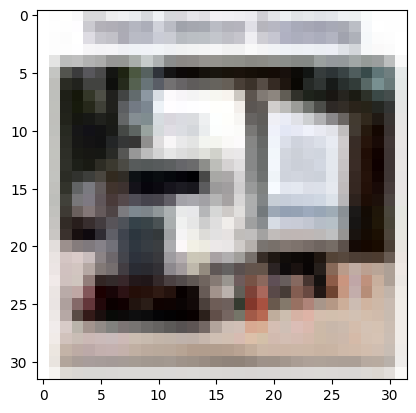

In [7]:
i = 666
plt.imshow(X_train[i])
print(y_train[i])

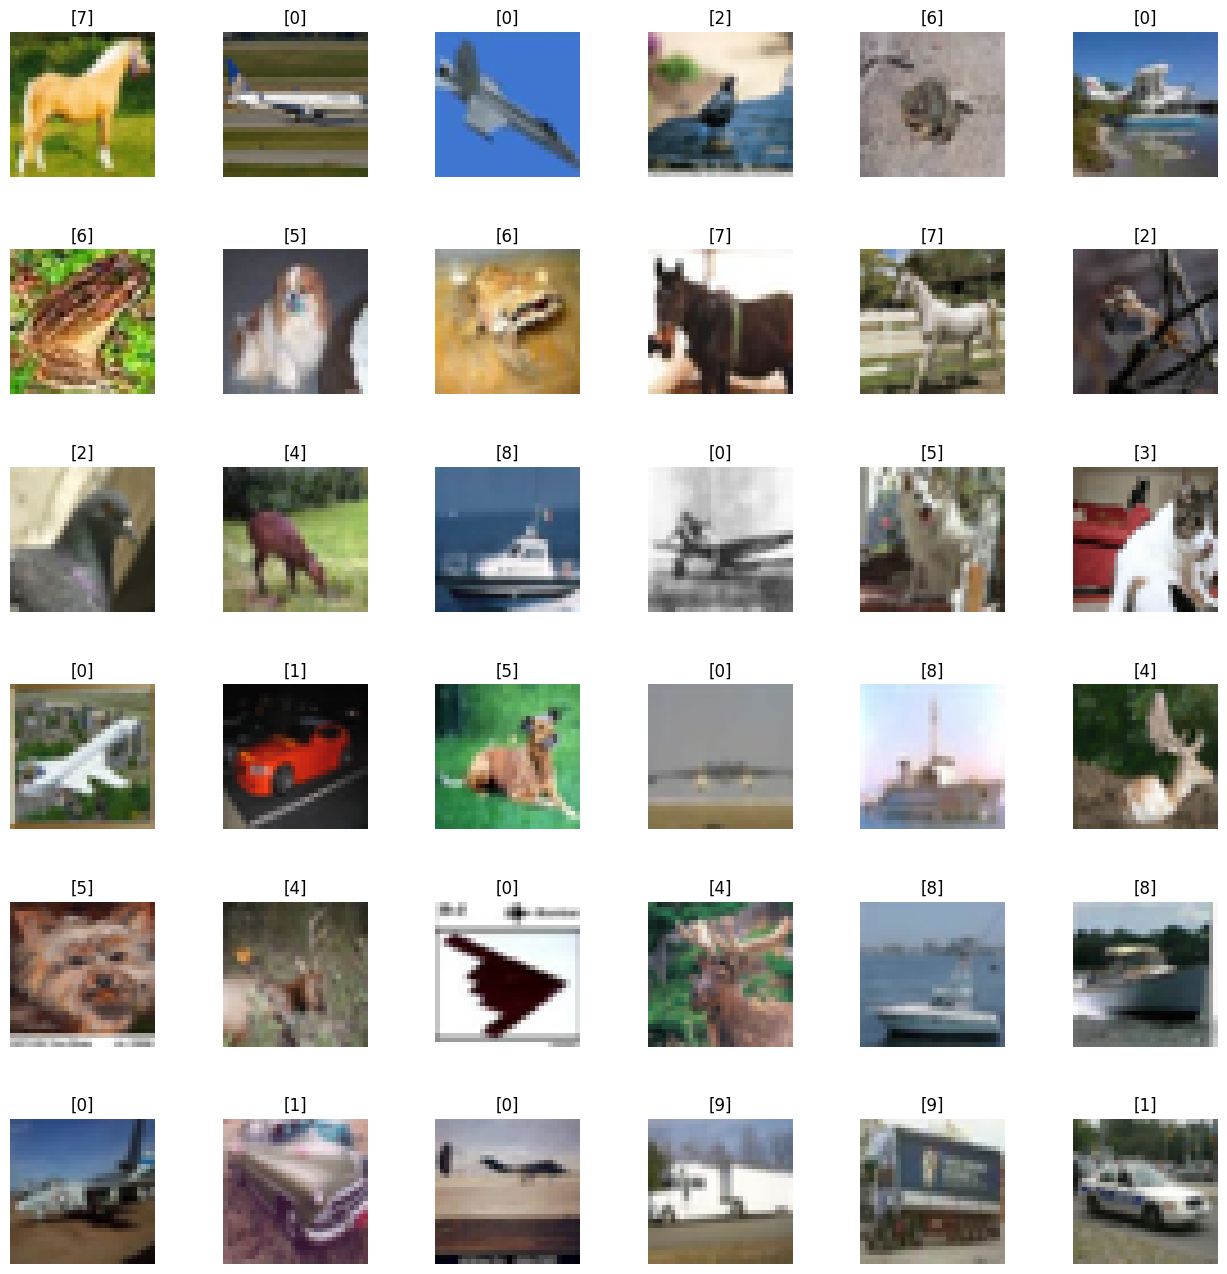

In [8]:
fig, axes = plt.subplots(6, 6, figsize = (16, 16))
axes = axes.ravel()

for i in np.arange(0, 6 * 6):
    index = np.random.randint(0, len(X_train))
    axes[i].imshow(X_train[index])
    axes[i].axis('off')
    axes[i].set_title(y_train[index])

plt.subplots_adjust(hspace=0.5)

## Data preparation

In [9]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [10]:
import keras
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
X_train /= 255
X_test /= 255

In [12]:
Input_shape = X_train.shape[1:]

## Train the model

In [13]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [14]:
model = Sequential()

# First convolutional layer with 64 filters
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=Input_shape))
model.add(MaxPooling2D(2, 2))

# Second convolutional layer with 128 filters
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

# Third convolutional layer with 256 filters
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D(2, 2))
model.add(Dropout(0.4))  # Using Dropout to reduce overfitting

model.add(Flatten())

# Reducing the number of units in dense layers to avoid overfitting
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=256, activation='relu'))

# Output layer for 10 classes
model.add(Dense(units=10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(learning_rate=0.001), 
              metrics=['accuracy'])

2024-01-16 17:58:57.720289: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-16 17:58:57.738250: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-16 17:58:57.738352: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 256)         295168    
                                                                 
 average_pooling2d (Average  (None, 2, 2, 256)         0

In [16]:
# model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.RMSprop(learning_rate=0.01), metrics=['accuracy'])
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [17]:
history = model.fit(X_train, y_train, batch_size=32, epochs=20)

Epoch 1/20


2024-01-16 17:58:58.733521: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer
2024-01-16 17:58:58.806692: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902
2024-01-16 17:58:58.858330: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-16 17:58:59.053285: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-01-16 17:58:59.292316: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f6e75445fa0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-01-16 17:58:59.292331: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 40

1563/1563 [==============================] - 6s 2ms/step - loss: 1.5380 - accuracy: 0.4279
Epoch 2/20
1563/1563 [==============================] - 3s 2ms/step - loss: 1.1418 - accuracy: 0.5916
Epoch 3/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.9796 - accuracy: 0.6556
Epoch 4/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.8746 - accuracy: 0.6930
Epoch 5/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.7957 - accuracy: 0.7191
Epoch 6/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.7317 - accuracy: 0.7426
Epoch 7/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6840 - accuracy: 0.7603
Epoch 8/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6420 - accuracy: 0.7745
Epoch 9/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.6008 - accuracy: 0.7860
Epoch 10/20
1563/1563 [==============================] - 3s 2ms/step - loss: 0.5662 - accurac

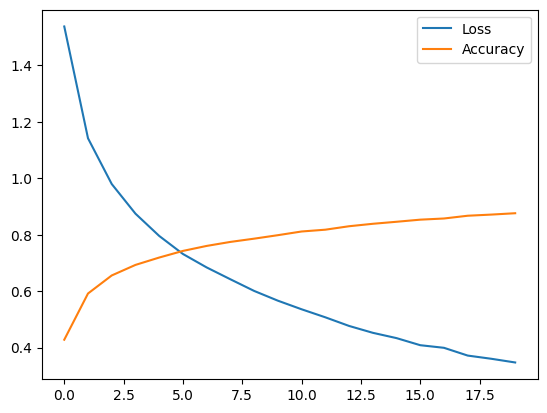

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.legend(["Loss", "Accuracy"])

## Evaluate the model

In [19]:
evaluation = model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.7434 - accuracy: 0.7752


In [20]:
predicted_classes = model.predict(X_test)
print(predicted_classes.shape)
predicted_classes = predicted_classes.argmax(1)
# np.set_printoptions(threshold=np.inf, precision=4)
# print(predicted_classes)

313/313 [==============================] - 0s 639us/step
(10000, 10)


In [21]:
y_test_1 = y_test
y_test = y_test.argmax(1)

<Axes: >

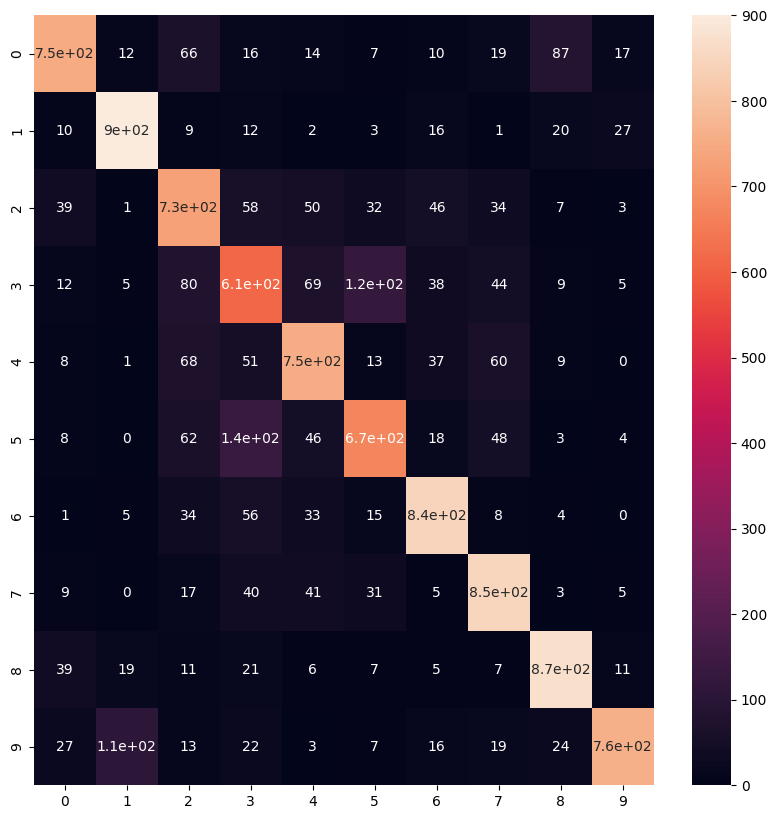

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_pred=predicted_classes, y_true=y_test)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True)

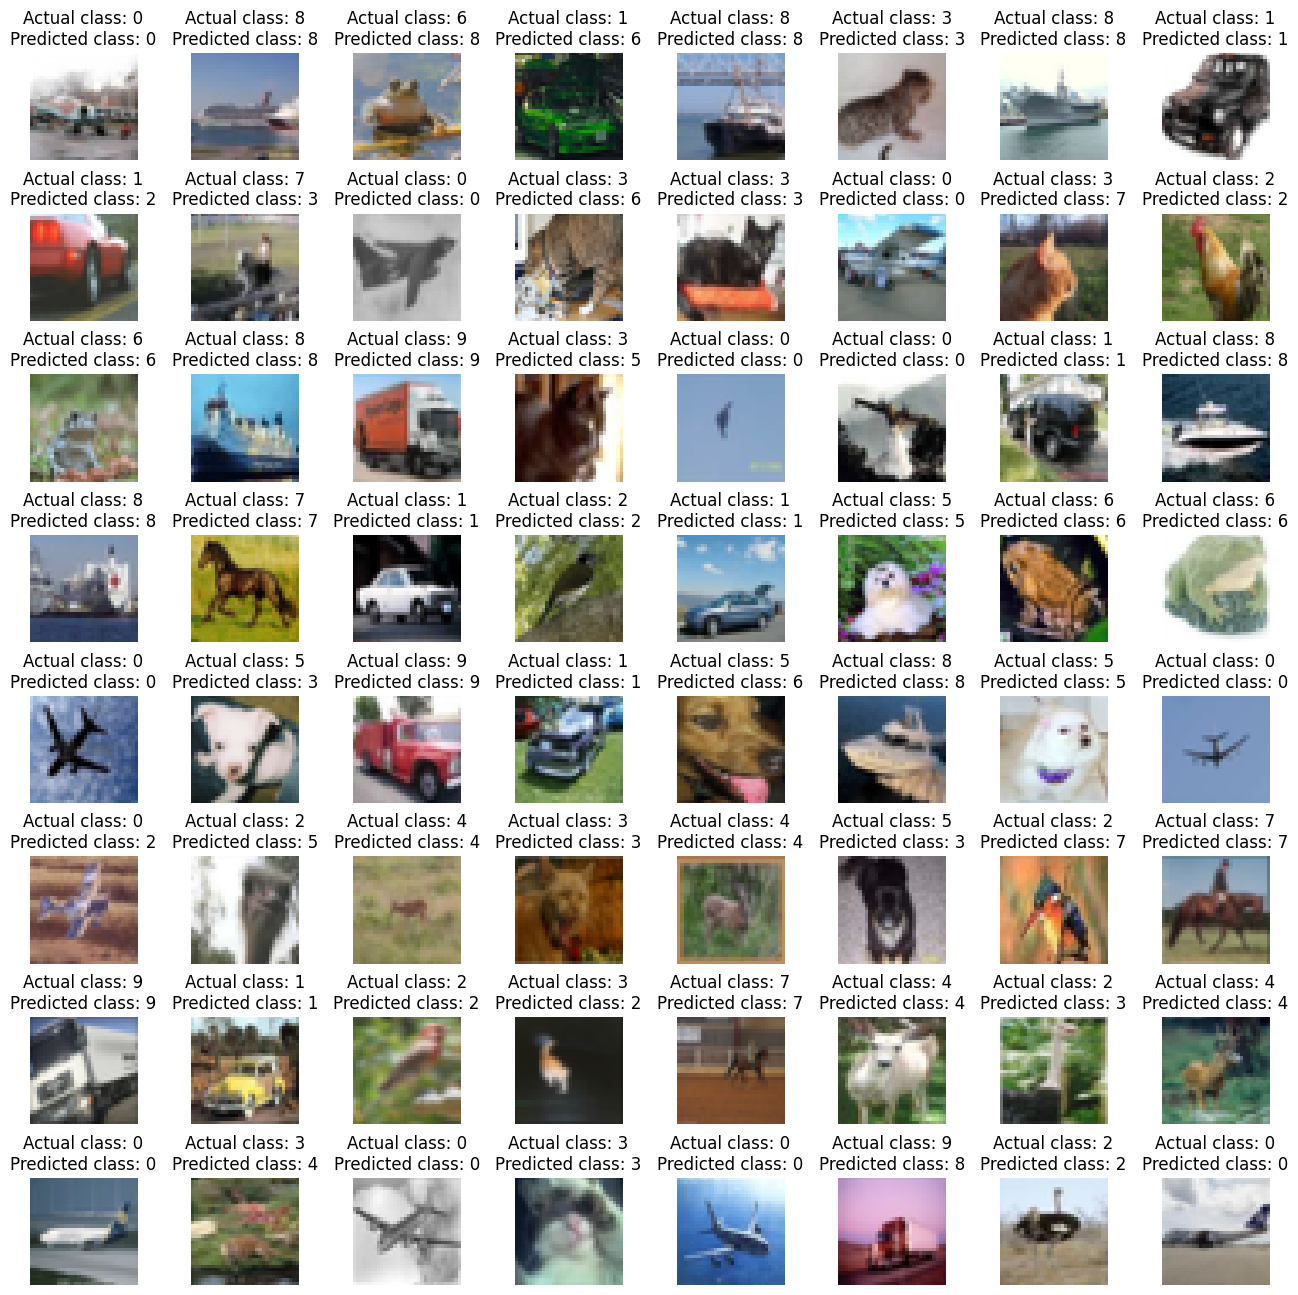

In [23]:
fig, axes = plt.subplots(8, 8, figsize=(16, 16))
axes = axes.ravel()

for i in np.arange(0, 8 * 8):
    index = np.random.randint(len(y_test))
    axes[i].imshow(X_test[index])
    axes[i].axis('off')
    axes[i].set_title('Actual class: {}\nPredicted class: {}'.format(y_test[index], predicted_classes[index]))

plt.subplots_adjust(hspace=0.5, wspace=0.5)
    

## Save the model

In [24]:
import os
dir = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(dir):
    os.makedirs(dir)
model_path = os.path.join(dir, 'trained_model.h5')
model.save(model_path)

/home/min/anaconda3/envs/data_science/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Image augmentation

In [25]:
from keras.preprocessing.image import ImageDataGenerator

# Assuming X_train and y_train are already defined
# Define your ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    width_shift_range=0.2,  # horizontal shift
    rotation_range=90,      # rotation
    horizontal_flip=True    # horizontal flip
)

# Apply augmentation to the training data
datagen.fit(X_train)

# Train the model using the augmented data
# The method fit now can handle data augmentation generators
model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=50,
)   


Epoch 1/50
  13/1563 [..............................] - ETA: 6s - loss: 2.5486 - accuracy: 0.4014  

2024-01-16 18:00:05.462388: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


1563/1563 [==============================] - 8s 5ms/step - loss: 1.4799 - accuracy: 0.4798
Epoch 2/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3451 - accuracy: 0.5247
Epoch 3/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2969 - accuracy: 0.5406
Epoch 4/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2601 - accuracy: 0.5562
Epoch 5/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2295 - accuracy: 0.5698
Epoch 6/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.2034 - accuracy: 0.5786
Epoch 7/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1915 - accuracy: 0.5814
Epoch 8/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1741 - accuracy: 0.5883
Epoch 9/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1526 - accuracy: 0.5949
Epoch 10/50
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1413 - accurac

In [26]:
score = model.evaluate(X_test, y_test_1)
print(f"Loss: {score[0]:.4f}, Accuracy: {score[1]:.4f}")

313/313 [==============================] - 0s 1ms/step - loss: 0.8513 - accuracy: 0.7109
Loss: 0.8513, Accuracy: 0.7109


## Save the new model

In [27]:
model_path = os.path.join(dir, 'trained_model_augmented.h5')
model.save(model_path)